En este notebook analizar el dataset : definir la clase implementada, estudiar los datos etc...

# Analisis del dataset


Este dataset esta compuesto por imagenes con el siguiente formato:
- Imagenes 200x200 pixeles RGB
- Nombre de la imagen : edad_año_fechaDeImagen.jpg

Como vamos a trabajar con distintos modelos de diferentes librerías tenemos definidos distintas implementaciones para tratar con imagenes; sin embargo, en este notebook usaremos
la clase ImgDataset, la cual herede de Dataset(perteneciente a pytorch)

In [1]:
#Vamos a trabajar con pytorch y este permite crear tu propio dataset
from torch.utils.data import Dataset
import os
from PIL import Image
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from itertools import islice

class ImgDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_labels = os.listdir(img_dir) #lista de los nombres de las fotos
        self.img_dir = img_dir #Ruta principal donde estan las imagenes
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):

        nombre_imagen = os.path.join(self.img_dir, self.img_labels[idx])  #Ruta completa
        imagen =  Image.open(nombre_imagen) #abrimos la imagen

        # Extraer la info del nombre del archivo
        parts = self.img_labels[idx].split('_')  # Separar por guiones bajos

        age = torch.tensor(int(parts[0])).float()  # Primer elemento: la edad
        gender = torch.tensor(int(parts[1]))  # Segundo elemento: el género
        race = torch.tensor(int(parts[2]))
        
        if self.transform:

          imagen = self.transform(imagen)  # Aplicar transformaciones a la imagen

        if self.target_transform:
          etiqueta = self.target_transform(etiqueta)  # Aplicar transformaciones a la etiqueta (opcional)

        return imagen, age,gender,race

Veamos una muestra de como son los imagenes:

In [5]:
utk_ruta = "C:\\Users\\Itziar\\Documents\\Documentos\\PAD\\UTKFace"

In [6]:
def mostrarImg(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


#Adaptamos las imagenes a un dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #Esto normalizara las imagenes
dataset = ImgDataset(utk_ruta,transform=transform) #Pasamos las imagenes a la estructura de datos

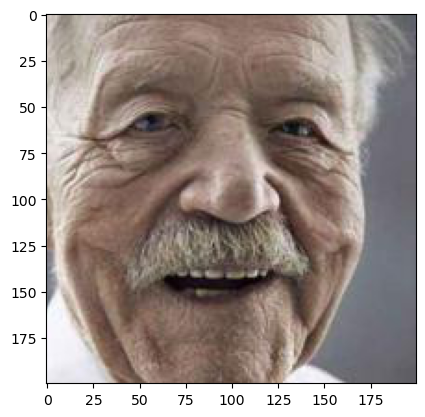

Edad: 100.0
Genero: 0
Raza 0


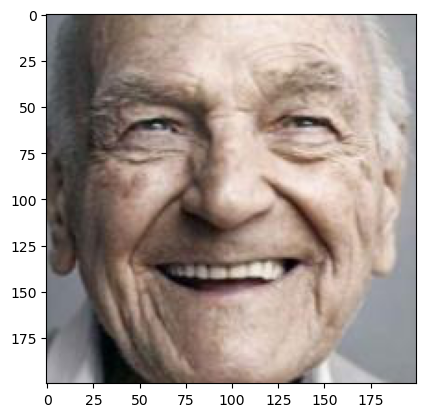

Edad: 100.0
Genero: 0
Raza 0


In [11]:
for imagenes in islice(dataset,2):
    imagen, edad, genero, raza = imagenes

    mostrarImg(imagen)
    print("Edad:", edad.item())
    print("Genero:", genero.item())
    print("Raza", raza.item())


Vamos a recopilar los datos de las personas para estudiarlos posteriormente:

In [ ]:
#Recopilacion de datos
generos =[]
edades = []
razas = []

for imagen  in dataset:
    imagen,edad,genero, raza = imagen

    edades.append(edad.item())
    generos.append(genero.item())
    razas.append(raza.item())



Ahora mostramos un grafica de barras para las edades y el genero:

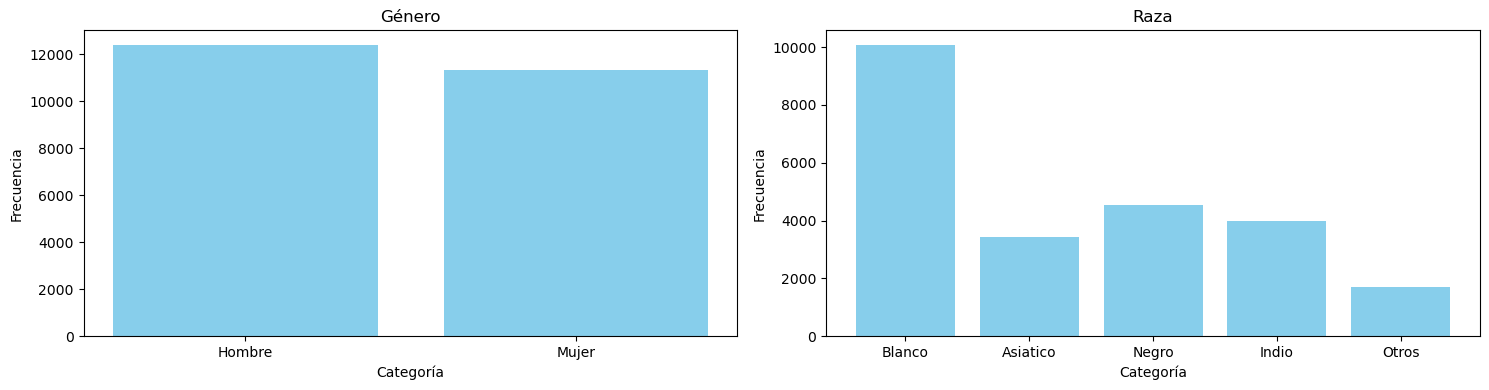

In [39]:

import matplotlib.pyplot as plt
from collections import Counter
# Crear lista de datos y etiquetas
# Diccionarios de mapeo
mapa_genero = {0: 'Hombre', 1: 'Mujer'}
mapa_raza = {0: 'Blanco', 1: 'Negro', 2: 'Asiatico', 3: 'Indio',4:'Otros'}

# Reemplazar números por etiquetas
genero_etiquetado = [mapa_genero[g] for g in generos]
raza_etiquetada = [mapa_raza[r] for r in razas]

# Lista de datos y títulos
datos = [genero_etiquetado, raza_etiquetada] 

# Dibujar diagramas de barras
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

titulos = ['Género', 'Raza'] 

for i, (arr, title) in enumerate(zip(datos, titulos)):
    conteo = Counter(arr)
    categorias = list(conteo.keys())
    frecuencias = list(conteo.values())
    
    axs[i].bar(categorias, frecuencias, color='skyblue')
    axs[i].set_title(title)
    axs[i].set_xlabel('Categoría')
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_xticks(categorias)

plt.tight_layout()
plt.show() 

Vemos que en el genero el dataset esta bastante equilibrado, hay casi la misma cantidad de mujeres que de hombres. Sin embargo, respecto a la raza, hay un reparto desigual habiendo un dominion de gente Blanca respeto a las demas. Esto podrá tener efectos negativos a la hora de entrenar nuestos modelos, provocando un sesgo o tendencia de eleccion a personas blancas.

Para la edad, como el rango es muy amplio( entre 0 y 100 años) hemos decidio clasificarlo por rangos de 10 años para facilitar la visualizacion de las graficas y su entendiemiento:

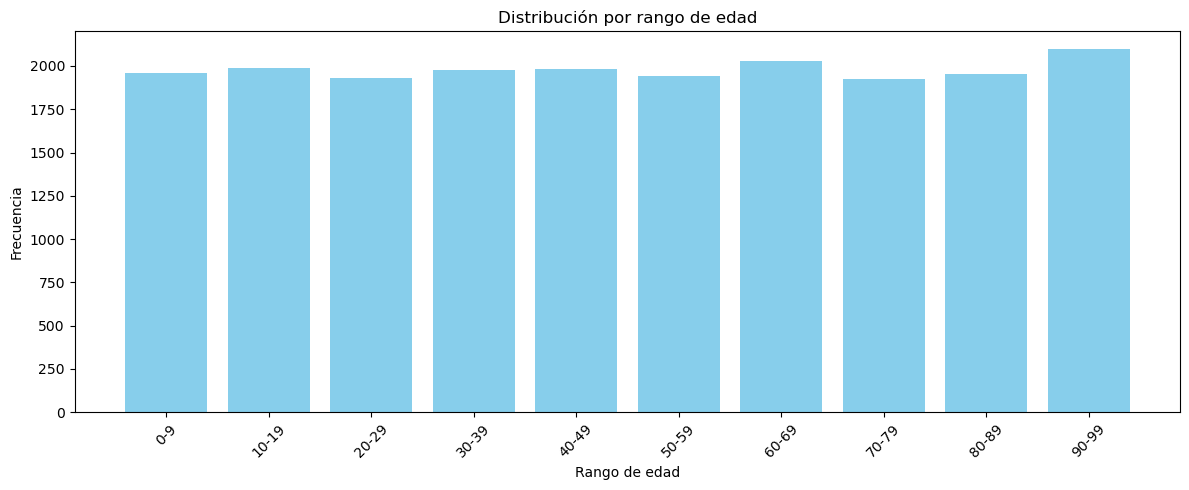

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simular array de 20,000 edades entre 0 y 100
edades = np.random.randint(0, 101, size=20000)

# Definir los límites de los rangos (bins)
bins = list(range(0, 100, 10)) + [100]  # [0, 10, 20, ..., 100, 101]

# Etiquetas personalizadas
etiquetas = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Cortar las edades en rangos
rango_edades = pd.cut(edades, bins=bins, labels=etiquetas, right=False)

# Contar cuántos hay en cada rango
conteo = rango_edades.value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 5))
plt.bar(conteo.index.astype(str), conteo.values, color='skyblue')
plt.title('Distribución por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vemos que en general la distribucion por edades es bastante equitativa, esto nos ayudará a que el modelo pueda aprender mejor.